# Type II Error for Lower One-sided Hypothesis Test for Mean of Normal Distribution with Variance Unknown

### by Douglas Timmer

This presentation demonstrates the the classical approach and p-value approach to conducting a lower one-sided hypothesis test for the mean with variance unknown. Jupyter notebooks utilize Python.

In [1]:
#specify values for hypothesis test
from IPython.display import Image,display,Latex, HTML
import math
import scipy.stats as stat
import numpy as np
import matplotlib.pyplot as plt
def roundOff(x,e):
    return math.floor(x*10**e+.5)/(10**e)
#Example from another textbook
mu_0=180
s=5.7
n=int(5)
mu=170
alpha=0.01
display(HTML("<h1>Step 0. Provide the information for the problem and the value of alpha"))
#display(Latex(r"""$$\mbox{Facts:}\,\bar{x}=%f,\, S=%f,\,n=%d,\, \alpha=%f,\,\mu_0=%f.$$"""%(xbar,s,n,alpha,mu_0)))

In [2]:
display(HTML("<h1>Step 1. Solve using the non-central t-distribution"))
nM1=n-1
print(nM1)
t_critical=stat.t.ppf(alpha,nM1)
print(t_critical)
d=(mu-mu_0)/(s/math.sqrt(n))
print(d)
beta=1.0-stat.nct.cdf(t_critical,nM1,d)
print(beta)

4
-3.74694738798
-3.9229262763154207
0.390611499385


-3.9229262763154207


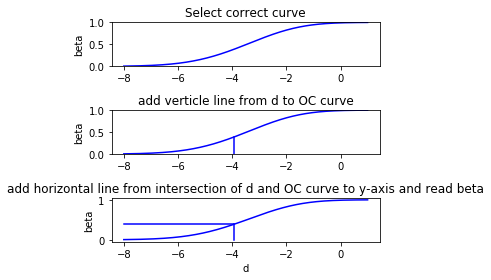

In [3]:
display(HTML("<h1> Type II error calculation using OC Curve"))
dx=np.linspace(-8,1,500)
oc=1.0*dx
for y in np.nditer(oc, op_flags=['readwrite']):
    y[...]=1.0-stat.nct.cdf(t_critical,nM1,y)
print(d)
#
plt.close("all")
plt.subplot(3,1,1)
plt.plot(dx,oc,'b')
plt.title('Select correct curve')
plt.ylabel('beta')
plt.ylim((0,1))
plt.subplot(3,1,2)
plt.title('add verticle line from d to OC curve')
plt.plot(dx,oc,'b')
plt.plot((d,d),(0,beta),'b') #
plt.ylabel('beta')
plt.ylim((0,1))
plt.subplot(3,1,3)
plt.title('add horizontal line from intersection of d and OC curve to y-axis and read beta')
plt.ylabel('beta')
plt.xlabel('d')
plt.plot(dx,oc,'b')
plt.plot((d,d),(0,beta),'b') #
plt.plot((d,-8),(beta,beta),'b')
plt.tight_layout()
plt.show()